In [124]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
import datetime as dt

In [125]:
df_raw = pd.read_csv('time_series_19-covid-Confirmed.csv')

In [126]:
df_raw.shape

(462, 61)

In [227]:
df_raw.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,53,59,70,75,82,114,147,177,212
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,511,581,639,639,701,773,839,825,878,889
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,160,178,178,200,212,226,243,266,313
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,117,129,149,149,197,238,428,566,673,790
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,32,32,39,46,64,64,73,103,103,186
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,48,55,65,65,92,112,134,171,210,267
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,15,18,21,21,36,49,57,71,94,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,15,18,20,20,35,46,61,68,78,94
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,2,2,3,3,5,7,7,7,33,35


# Basic EDA

In [5]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df_raw)
profile.to_file('data report.html')

# Fields

In [6]:
for index in df_raw:
    print(index)

Province/State
Country/Region
Lat
Long
1/22/20
1/23/20
1/24/20
1/25/20
1/26/20
1/27/20
1/28/20
1/29/20
1/30/20
1/31/20
2/1/20
2/2/20
2/3/20
2/4/20
2/5/20
2/6/20
2/7/20
2/8/20
2/9/20
2/10/20
2/11/20
2/12/20
2/13/20
2/14/20
2/15/20
2/16/20
2/17/20
2/18/20
2/19/20
2/20/20
2/21/20
2/22/20
2/23/20
2/24/20
2/25/20
2/26/20
2/27/20
2/28/20
2/29/20
3/1/20
3/2/20
3/3/20
3/4/20
3/5/20
3/6/20
3/7/20
3/8/20
3/9/20
3/10/20
3/11/20
3/12/20
3/13/20
3/14/20
3/15/20
3/16/20
3/17/20
3/18/20


# Country/Region Summary

In [128]:
attribute = 'Country/Region'
print('attribute name:',attribute)
print('unique nunmbers' ,len(df_raw[attribute].unique()))
print('unique nunmbers propotion',len(df_raw[attribute].unique())/df_raw.shape[0] )      
print('null numbers', df_raw.shape[0] - df_raw[attribute].count())
print('0 value numbers', df_raw[df_raw[attribute] == 0].shape[0] )

attribute name: Country/Region
unique nunmbers 152
unique nunmbers propotion 0.329004329004329
null numbers 0
0 value numbers 0


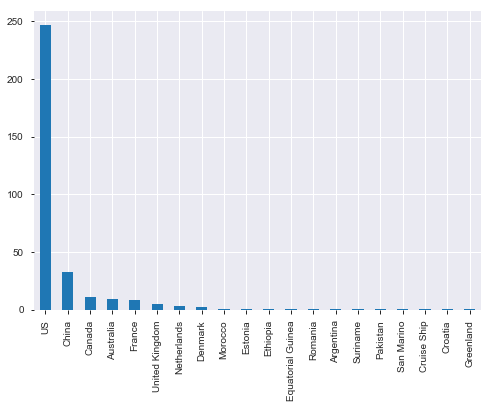

In [129]:
df_raw[attribute].value_counts().head(20).plot(kind='bar')
plt.savefig('hist.png')

# Choose US

In [169]:
df_US = df_raw[df_raw['Country/Region'] == 'US'].copy()
df_US.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,267,366,442,568,572,643,904,1076,1014
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,173,220,328,421,525,732,967,1706,2495
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,144,177,221,282,340,426,557,698,751
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,92,95,108,123,138,164,197,218,218
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,46,46,46,46,46,46,47,47,47
103,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,21,21,21,21,21,21,21,20,21,21
104,Georgia,US,33.0406,-83.6431,0,0,0,0,0,0,...,0,17,23,31,42,66,99,121,146,199
105,Colorado,US,39.0598,-105.3111,0,0,0,0,0,0,...,0,15,34,45,49,101,131,160,160,184
106,Florida,US,27.7663,-81.6868,0,0,0,0,0,0,...,0,15,28,35,50,76,115,155,216,314
107,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,0,...,0,15,23,29,29,69,98,178,267,267


## Province/State Summary

In [170]:
attribute = 'Province/State'
print('attribute name:',attribute)
print('unique nunmbers' ,len(df_US[attribute].unique()))
print('unique nunmbers propotion',len(df_US[attribute].unique())/df_US.shape[0] )      
print('null numbers', df_US.shape[0] - df_US[attribute].count())
print('0 value numbers', df_US[df_US[attribute] == 0].shape[0] )

attribute name: Province/State
unique nunmbers 247
unique nunmbers propotion 1.0
null numbers 0
0 value numbers 0


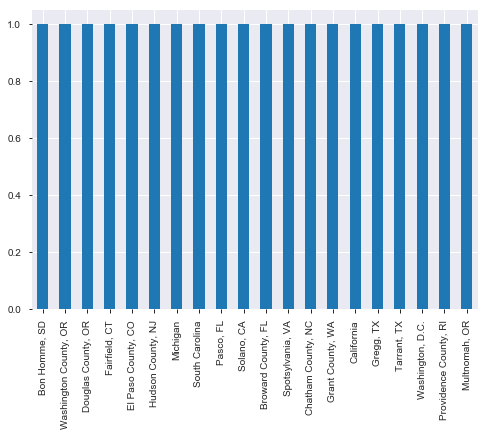

In [171]:
df_US[attribute].value_counts().head(20).plot(kind='bar')
plt.savefig('hist.png')

In [172]:
df_US['Province/State'].unique()

array(['Washington', 'New York', 'California', 'Massachusetts',
       'Diamond Princess', 'Grand Princess', 'Georgia', 'Colorado',
       'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Hawaii', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Kitsap, WA', 'Solano, CA', 'Santa Cruz, CA', 'Napa, CA',
       'Ventura, CA', 'Worcester, MA', 'Gwinnett, GA', 'DeKalb, GA',
       'Floyd, GA', 'Fayette, GA', 'Gregg, TX', 'Monmouth, NJ',
       'Burlington, NJ', 'Camden, NJ', 'Passaic, NJ'

## The Province/State Field is messy, should do standardization first.

In [173]:
df_US['Lat'] = df_US['Lat'].astype(str)
df_US['Long'] = df_US['Long'].astype(str)
df_US['Geo'] =  df_US['Lat'] + ' , ' + df_US['Long']


In [174]:
# df_US = df_US.head(10).copy()

# from geopy.geocoders import Nominatim

# def State_Standarize(geo):
#     geolocator = Nominatim(user_agent="winfred")
#     location = geolocator.reverse(geo)
#     address = location.raw['address']
#     state = address['state']
#     print(address)
#     return state



In [197]:
%%time
import time
from geopy.geocoders import Nominatim

df_US['State_Sta'] = -1
df_US['Country_Sta'] = -1

count = 0
for i in df_US.index:

    geolocator = Nominatim(user_agent="test1")
    temp = df_US.loc[i, 'Geo']
    location = geolocator.reverse(temp)
    address = location.raw['address']

    try:
        state = address['state']
        df_US.loc[i, 'State_Sta'] = state
    except:
        continue
    try:
        country = address['country_code']
        df_US.loc[i, 'Country_Sta'] = country
    except:
        continue
    
#     count = count + 1
#     if (count%5) == 0:
#         time.sleep(1)

CPU times: user 3.83 s, sys: 200 ms, total: 4.03 s
Wall time: 2min 21s


In [195]:
# temp_df = df_US[df_US['State_Sta'] == -1]
# for i in temp_df.index:

#     geolocator = Nominatim(user_agent="test1")
#     temp = temp_df.loc[i, 'Geo']
#     location = geolocator.reverse(temp)
#     address = location.raw['address']

#     try:
#         state = address['state']
#         temp_df.loc[i, 'State_Sta'] = state
#     except:
#         continue
#     try:
#         country = address['country_code']
#         temp_df.loc[i, 'Country_Sta'] = country
#     except:
#         continue

## State_Sta Summary

In [198]:
attribute = 'State_Sta'
print('attribute name:',attribute)
print('unique nunmbers' ,len(df_US[attribute].unique()))
print('unique nunmbers propotion',len(df_US[attribute].unique())/df_US.shape[0] )      
print('null numbers', df_US.shape[0] - df_US[attribute].count())
print('0 value numbers', df_US[df_US[attribute] == 0].shape[0] )

attribute name: State_Sta
unique nunmbers 56
unique nunmbers propotion 0.22672064777327935
null numbers 0
0 value numbers 0


Since the US have only 50 states, it means the state field still needs to be pre-processed.

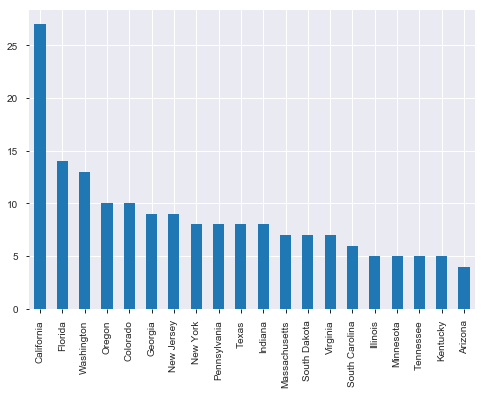

In [199]:
df_US[attribute].value_counts().head(20).plot(kind='bar')
plt.savefig('hist.png')

In [200]:
df_US[attribute].unique()

array(['Washington', 'New York', 'California', 'Massachusetts', '神奈川県',
       -1, 'Georgia', 'Colorado', 'Florida', 'New Jersey', 'Oregon',
       'Texas', 'Illinois', 'Pennsylvania', 'Iowa', 'Maryland',
       'North Carolina', 'South Carolina', 'Tennessee', 'Virginia',
       'Arizona', 'Indiana', 'Kentucky', 'District of Columbia', 'Nevada',
       'New Hampshire', 'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island',
       'Wisconsin', 'Connecticut', 'Oklahoma', 'Utah', 'Kansas',
       'Louisiana', 'Missouri', 'Vermont', 'Alaska', 'Arkansas',
       'Delaware', 'Idaho', 'Maine', 'Michigan', 'Mississippi', 'Montana',
       'New Mexico', 'North Dakota', 'South Dakota', 'West Virginia',
       'Wyoming', 'Hawaii', 'Alabama', 'Puerto Rico', 'Guam',
       'United States Virgin Islands'], dtype=object)

## Country_Sta Summary

In [201]:
attribute = 'Country_Sta'
print('attribute name:',attribute)
print('unique nunmbers' ,len(df_US[attribute].unique()))
print('unique nunmbers propotion',len(df_US[attribute].unique())/df_US.shape[0] )      
print('null numbers', df_US.shape[0] - df_US[attribute].count())
print('0 value numbers', df_US[df_US[attribute] == 0].shape[0] )

attribute name: Country_Sta
unique nunmbers 3
unique nunmbers propotion 0.012145748987854251
null numbers 0
0 value numbers 0


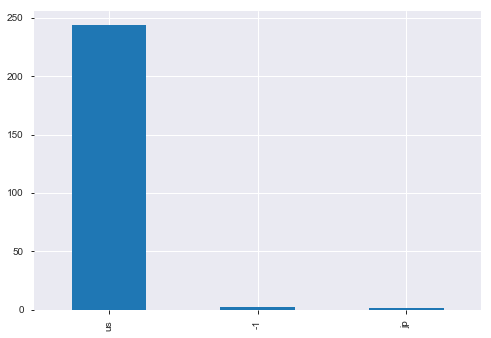

In [202]:
df_US[attribute].value_counts().head(20).plot(kind='bar')
plt.savefig('hist.png')

In [203]:
df_US[attribute].unique()

array(['us', 'jp', -1], dtype=object)

In [207]:
df_US[df_US[attribute] == -1]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,Geo,State_Sta,Country_Sta
103,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,21,21,21,21,20,21,21,"37.6489 , -122.6655",-1,-1
130,Hawaii,US,21.0943,-157.4983,0,0,0,0,0,0,...,2,2,4,6,7,10,14,"21.0943 , -157.4983",-1,-1


In [208]:
df_US[df_US[attribute] == 'jp']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,Geo,State_Sta,Country_Sta
102,Diamond Princess,US,35.4437,139.638,0,0,0,0,0,0,...,46,46,46,46,47,47,47,"35.4437 , 139.638",神奈川県,jp


## Filtering the non-US records

In [209]:
df_US = df_US[df_US[attribute] == 'us'].copy()

In [210]:
df_US['State_Sta'].unique()

array(['Washington', 'New York', 'California', 'Massachusetts', 'Georgia',
       'Colorado', 'Florida', 'New Jersey', 'Oregon', 'Texas', 'Illinois',
       'Pennsylvania', 'Iowa', 'Maryland', 'North Carolina',
       'South Carolina', 'Tennessee', 'Virginia', 'Arizona', 'Indiana',
       'Kentucky', 'District of Columbia', 'Nevada', 'New Hampshire',
       'Minnesota', 'Nebraska', 'Ohio', 'Rhode Island', 'Wisconsin',
       'Connecticut', 'Oklahoma', 'Utah', 'Kansas', 'Louisiana',
       'Missouri', 'Vermont', 'Alaska', 'Arkansas', 'Delaware', 'Idaho',
       'Maine', 'Michigan', 'Mississippi', 'Montana', 'New Mexico',
       'North Dakota', 'South Dakota', 'West Virginia', 'Wyoming',
       'Hawaii', 'Alabama', 'Puerto Rico', 'Guam',
       'United States Virgin Islands'], dtype=object)

In [211]:
print('unique nunmbers' ,len(df_US['State_Sta'].unique()))

unique nunmbers 54


it is clean right now, the extra four states belong to 
'District of Columbia'
'Puerto Rico', 
'Guam',
'United States Virgin Islands'
But we still need to group the data(Province/State)

In [239]:
df_US.shape

(244, 58)

In [ ]:
df_US[]

In [240]:
df_US

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,State_Sta
98,0,0,0,0,0,0,0,0,0,0,...,267,366,442,568,572,643,904,1076,1014,Washington
99,0,0,0,0,0,0,0,0,0,0,...,173,220,328,421,525,732,967,1706,2495,New York
100,0,0,0,0,0,0,0,0,0,0,...,144,177,221,282,340,426,557,698,751,California
101,0,0,0,0,0,0,0,0,0,0,...,92,95,108,123,138,164,197,218,218,Massachusetts
104,0,0,0,0,0,0,0,0,0,0,...,17,23,31,42,66,99,121,146,199,Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delaware
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,6,12,29,39,46,Alabama
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,5,5,5,5,Puerto Rico
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,5,Guam


In [213]:
df_US.drop(['Lat'], axis = 1, inplace= True)
df_US.drop(['Long'], axis = 1, inplace= True)
df_US.drop(['Province/State'], axis = 1, inplace= True)
df_US.drop(['Country/Region'], axis = 1, inplace= True)

In [214]:
df_US.drop(['Geo'],  axis = 1,inplace= True)

In [215]:
df_US.drop(['Country_Sta'],  axis = 1,inplace= True)

In [216]:
df_US

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,State_Sta
98,0,0,0,0,0,0,0,0,0,0,...,267,366,442,568,572,643,904,1076,1014,Washington
99,0,0,0,0,0,0,0,0,0,0,...,173,220,328,421,525,732,967,1706,2495,New York
100,0,0,0,0,0,0,0,0,0,0,...,144,177,221,282,340,426,557,698,751,California
101,0,0,0,0,0,0,0,0,0,0,...,92,95,108,123,138,164,197,218,218,Massachusetts
104,0,0,0,0,0,0,0,0,0,0,...,17,23,31,42,66,99,121,146,199,Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delaware
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,6,12,29,39,46,Alabama
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,5,5,5,5,Puerto Rico
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,5,Guam


## Group by State

In [260]:
df_US_clean = df_US.copy()
df_US_clean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,State_Sta
98,0,0,0,0,0,0,0,0,0,0,...,267,366,442,568,572,643,904,1076,1014,Washington
99,0,0,0,0,0,0,0,0,0,0,...,173,220,328,421,525,732,967,1706,2495,New York
100,0,0,0,0,0,0,0,0,0,0,...,144,177,221,282,340,426,557,698,751,California
101,0,0,0,0,0,0,0,0,0,0,...,92,95,108,123,138,164,197,218,218,Massachusetts
104,0,0,0,0,0,0,0,0,0,0,...,17,23,31,42,66,99,121,146,199,Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Delaware
414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,6,12,29,39,46,Alabama
417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,5,5,5,5,Puerto Rico
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,3,5,Guam


In [261]:
df_US_clean = df_US_clean.groupby(['State_Sta']).sum()

# Export US Clean Data

In [219]:
df_US_clean.to_csv('time_series_19-covid-Confirmed_US_State.csv')

In [262]:
df_US_clean

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
State_Sta,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,6,12,29,39,46
Alaska,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,6
Arizona,0,0,0,0,1,1,1,1,1,1,...,4,6,9,9,9,12,13,18,20,27
Arkansas,0,0,0,0,0,0,0,0,0,0,...,0,0,1,6,6,12,16,22,22,33
California,0,0,0,0,2,2,2,2,2,3,...,101,144,177,221,282,340,426,557,698,751
Colorado,0,0,0,0,0,0,0,0,0,0,...,7,15,34,45,49,101,131,160,160,184
Connecticut,0,0,0,0,0,0,0,0,0,0,...,0,2,3,5,11,22,24,30,68,68
Delaware,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,4,6,7,8,16,19
District of Columbia,0,0,0,0,0,0,0,0,0,0,...,2,5,10,10,10,10,16,22,22,31


In [253]:
sum(df_US_clean['3/18/20'])

7701

In [263]:
df_US_clean = df_US_clean.T.copy()

In [264]:
df_US_clean

State_Sta,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,United States Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/26/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/27/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/28/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/29/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/30/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1/31/20,0,0,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [266]:
sum(df_US_clean.loc['3/18/20',])

7701

In [273]:
df_US_clean['US Total Confirmed'] = 0
for index in df_US_clean.index:
    df_US_clean.loc[index, 'US Total Confirmed'] = sum(df_US_clean.loc[index,])

In [274]:
df_US_clean

State_Sta,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,United States Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,US Total Confirmed
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1/26/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1/27/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1/28/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1/29/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1/30/20,0,0,1,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,5
1/31/20,0,0,1,0,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,7


In [275]:
df_US_clean = df_US_clean[['US Total Confirmed']].copy()
df_US_clean.to_csv('time_series_19-covid-Confirmed_US_Total.csv')

In [276]:
df_US_clean

State_Sta,US Total Confirmed
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
1/27/20,5
1/28/20,5
1/29/20,5
1/30/20,5
1/31/20,7
